R2_Score: 0.9438981057070259
Calc to ddg
R2_Score: 0.5942903332980118


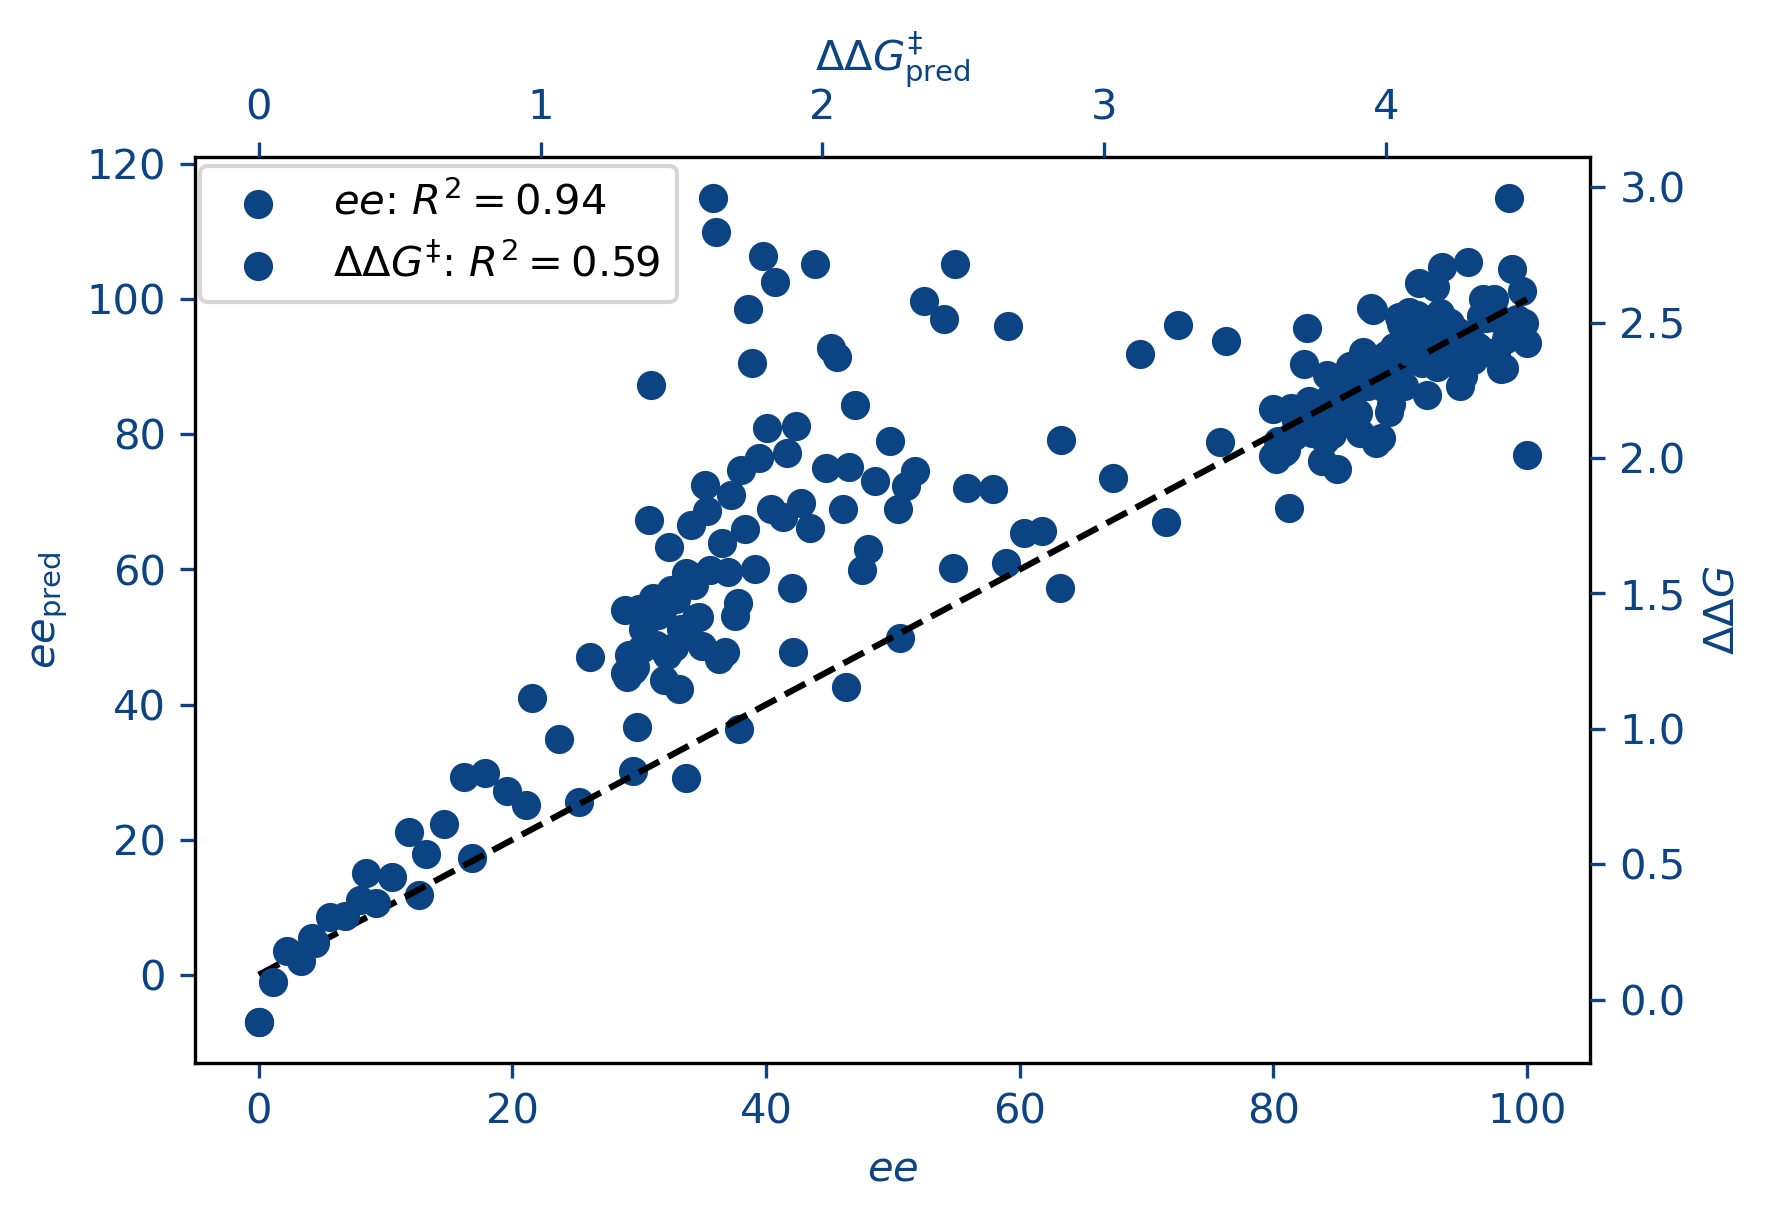

In [1]:
import calc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

gensch_palette = ['#0C4383',
            '#22A0B6',
            '#46E0A6',
            '#7B1346',
            '#CB0C59']

# random data distribution in ee
ee1 = np.linspace(0, 80, 20)
ee2 = np.linspace(80, 100, 100)

ee = np.concatenate([ee1, ee2])

# add some noise to the data
noise = np.random.normal(0, 5, 120)

# skew the data
ee_pred = ee + noise
print(f'R2_Score: {r2_score(ee, ee_pred)}')
print(f'Calc to ddg')
T = 298



ddg = [calc.calc_ddg(e, T) for e , ep in zip(ee, ee_pred) if ep <= 99.9999]
ddg_pred = [calc.calc_ddg(e, T) for e in ee_pred if e <= 99.9999]

r2_ee = r2_score(ee, ee_pred)
r2_ddg = r2_score(ddg, ddg_pred)

print(f'R2_Score: {r2_score(ddg, ddg_pred)}')
fig = plt.figure(dpi=300)

ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

ax.scatter(ee, ee_pred, label=fr'$ee$: $R^2 = ${r2_ee:.2f}', color=gensch_palette[0])
ax.plot([0, 100], [0, 100], color='black', linestyle='--')
ax2.scatter(ddg, ddg_pred, label=rf'$\Delta\Delta G^‡$: $R^2 = ${r2_ddg:.2f}', color=gensch_palette[0])

ax.set_xlabel('$ee$', color=gensch_palette[0])
ax.set_ylabel(r'$ee_\mathrm{pred}$', color=gensch_palette[0])

ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(r'$\Delta\Delta G^‡_\mathrm{pred}$', color=gensch_palette[0]) 
ax2.set_ylabel(r'$\Delta\Delta G$', color=gensch_palette[0])       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors=gensch_palette[0])
ax2.tick_params(axis='y', colors=gensch_palette[0])

ax.tick_params(axis='x', colors=gensch_palette[0])
ax.tick_params(axis='y', colors=gensch_palette[0])

fig.legend(loc='upper center', bbox_to_anchor=(0.26, 0.89))

In [2]:
def compare_ee_ddg_model(ee, temp, noise_level=5, dataset=''):
    import matplotlib.pyplot as plt
    import numpy as np
    import calc
    from sklearn.metrics import r2_score
    plt.rcParams['font.size'] = 8.5
    fontsize = 8.5
    gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']

    '''
    ee should be a numpy array
    noise is used to mimic prediction
    '''
    noise = np.random.normal(0, noise_level, len(ee))
    # make sure ee is numpy array
    ee = np.array(ee)
    # make sure temp is numpy array
    temp = np.array(temp)
    # skew the data
    ee_pred = ee + noise

    ddg = [calc.calc_ddg(e, T) for e , T, ep in zip(ee, temp, ee_pred) if ep <= 99.9999]
    ddg_pred = [calc.calc_ddg(e, T) for e, T in zip(ee_pred, temp) if e <= 99.9999]

    r2_ee = r2_score(ee, ee_pred)
    r2_ddg = r2_score(ddg, ddg_pred)

    fig = plt.figure(figsize=(3.34,3.34), dpi=300)

    ax=fig.add_subplot(111, label="1")
    ax.scatter(ddg, ddg_pred, marker='s', s=fontsize, label=rf'$R^2_{{\Delta\Delta G^‡}} = ${r2_ddg:.2f}', color=gensch_palette[4], alpha=.5)
    ax.spines['bottom'].set_color(gensch_palette[4])
    ax.spines['left'].set_color(gensch_palette[4])

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.set_ylabel(r'$\Delta\Delta G^‡_\mathrm{pred}$ / kcal mol$^{-1}$', color=gensch_palette[4]) 
    ax.set_xlabel(r'$\Delta\Delta G^‡_\mathrm{measured}$ / kcal mol$^{-1}$', color=gensch_palette[4])       

    ax.tick_params(axis='x', colors=gensch_palette[4])
    ax.tick_params(axis='y', colors=gensch_palette[4])

    ax2=fig.add_subplot(111, label="2", frame_on=False)
    for tick in ax.get_xticklabels():
        tick.set_color(gensch_palette[4])
    for tick in ax.get_yticklabels():
        tick.set_color(gensch_palette[4])

    ax2.scatter(ee, ee_pred, marker='s', s=fontsize, label=fr'$R^2_{{ee}} = ${r2_ee:.2f}', color=gensch_palette[0], alpha=.5)
    ax2.plot([0, 100], [0, 100], color=gensch_palette[2], linewidth = 1, linestyle='--')
    ax.spines['top'].set_color(gensch_palette[0])
    ax.spines['right'].set_color(gensch_palette[0])
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.xaxis.set_label_position('top')
    ax2.yaxis.set_label_position('right')
    ax2.set_xlabel(r'$ee_\mathrm{measured}$ / %', color=gensch_palette[0])
    ax2.set_ylabel(r'$ee_\mathrm{pred}$ / %', color=gensch_palette[0])
    
    for tick in ax2.get_xticklabels():
        tick.set_color(gensch_palette[0])
    for tick in ax2.get_yticklabels():
        tick.set_color(gensch_palette[0])

    ax2.tick_params(axis='x', colors=gensch_palette[0])
    ax2.tick_params(axis='y', colors=gensch_palette[0])

    print(f'R2_Score ee: {r2_score(ee, ee_pred):.2f}')
    print(fr'R2_Score: ddg: {r2_score(ddg, ddg_pred):.2f}')

    # add legend
    fig.legend(loc='upper center', bbox_to_anchor=(0.30, 0.89))

    plt.savefig(f'Fig4_{dataset}.png',  dpi=300)


R2_Score ee: 0.89
R2_Score: ddg: 0.44


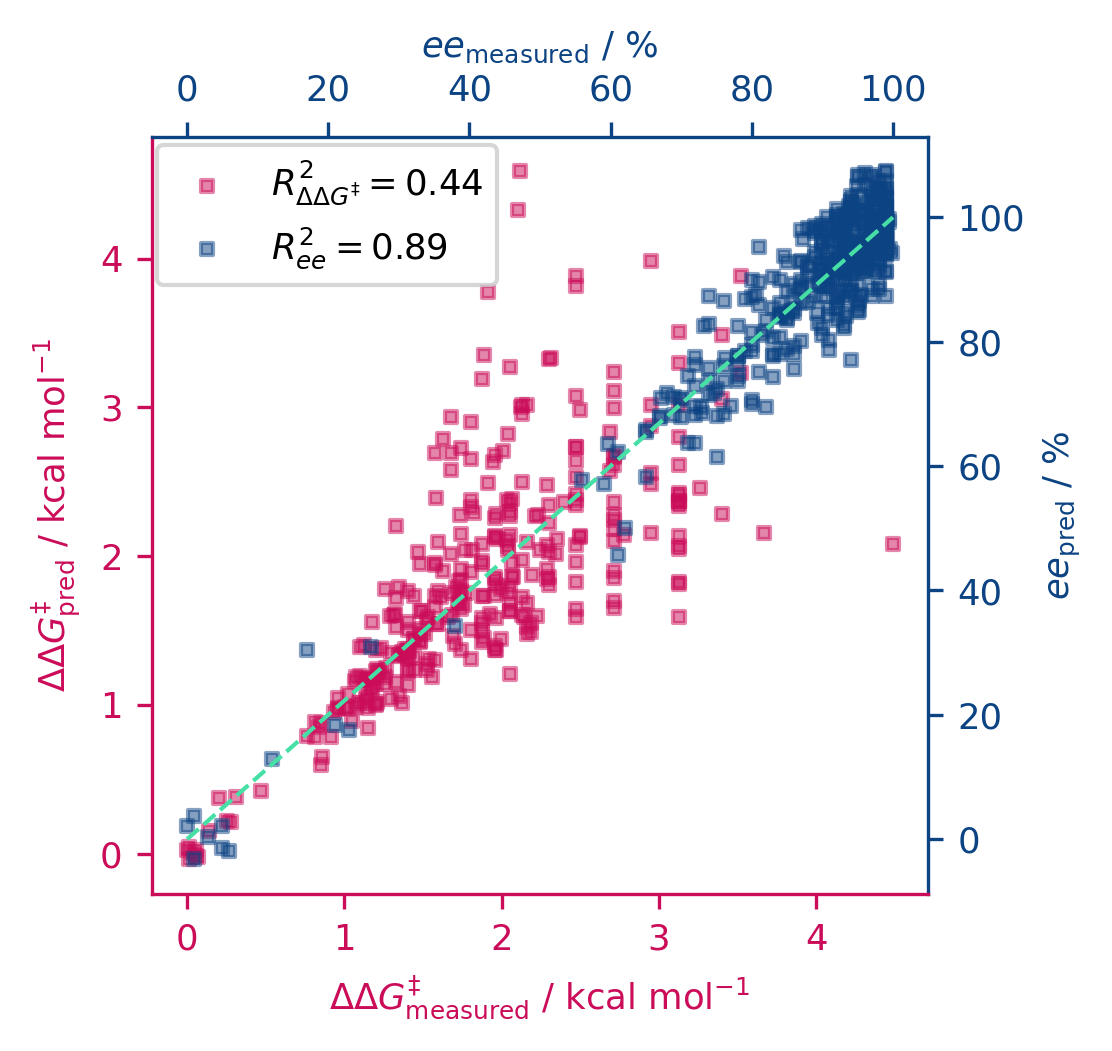

In [3]:
import pandas as pd
dataset = 'Sunoj_PNAS'
df = pd.read_csv(f'../code/datasets_230520/{dataset}.csv')
compare_ee_ddg_model(df['ee'], df['T'], dataset=dataset)

In [6]:
def compare_ddg_ee_model(ee, temp, noise_level=5, dataset=''):
    import matplotlib.pyplot as plt
    import numpy as np
    import calc
    from sklearn.metrics import r2_score
    plt.rcParams['font.size'] = 8.5
    fontsize = 8.5
    gensch_palette = ['#0C4383',
                '#22A0B6',
                '#46E0A6',
                '#7B1346',
                '#CB0C59']

    '''
    ee should be a numpy array
    noise is used to mimic prediction
    '''
    # Calculate the original ddG values from the ee and temp
    ddg = np.array([calc.calc_ddg(e, T) for e, T in zip(ee, temp)])

    # Apply noise to the ddG values
    noise = np.random.normal(0, noise_level * ddg / 100, len(ddg))
    ddg_noisy = ddg + noise

    # Translate noisy ddG back to ee using the reverse of calc_ddg if available
    # Assuming calc.calc_ee is the reverse function
    ee_pred = np.array([calc.calc_ee(d, T) for d, T in zip(ddg_noisy, temp)])

    # Now we can calculate the r2 score for ee
    r2_ee = r2_score(ee, ee_pred)
    r2_ddg = r2_score(ddg, ddg_noisy)

    fig = plt.figure(figsize=(3.34,3.34), dpi=300)

    ax=fig.add_subplot(111, label="1")
    ax.scatter(ddg, ddg_noisy, marker='s', s=fontsize, label=rf'$R^2_{{\Delta\Delta G^‡}} = ${r2_ddg:.2f}', color=gensch_palette[4], alpha=.5)
    ax.spines['bottom'].set_color(gensch_palette[4])
    ax.spines['left'].set_color(gensch_palette[4])

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()
    ax.set_ylabel(r'$\Delta\Delta G^‡_\mathrm{pred}$ / kcal mol$^{-1}$', color=gensch_palette[4]) 
    ax.set_xlabel(r'$\Delta\Delta G^‡_\mathrm{measured}$ / kcal mol$^{-1}$', color=gensch_palette[4])       

    ax.tick_params(axis='x', colors=gensch_palette[4])
    ax.tick_params(axis='y', colors=gensch_palette[4])

    ax2=fig.add_subplot(111, label="2", frame_on=False)
    for tick in ax.get_xticklabels():
        tick.set_color(gensch_palette[4])
    for tick in ax.get_yticklabels():
        tick.set_color(gensch_palette[4])

    ax2.scatter(ee, ee_pred, marker='s', s=fontsize, label=fr'$R^2_{{ee}} = ${r2_ee:.2f}', color=gensch_palette[0], alpha=.5)
    ax2.plot([0, 100], [0, 100], color=gensch_palette[2], linewidth = 1, linestyle='--')
    ax.spines['top'].set_color(gensch_palette[0])
    ax.spines['right'].set_color(gensch_palette[0])
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.xaxis.set_label_position('top')
    ax2.yaxis.set_label_position('right')
    ax2.set_xlabel(r'$ee_\mathrm{measured}$ / %', color=gensch_palette[0])
    ax2.set_ylabel(r'$ee_\mathrm{pred}$ / %', color=gensch_palette[0])
    
    for tick in ax2.get_xticklabels():
        tick.set_color(gensch_palette[0])
    for tick in ax2.get_yticklabels():
        tick.set_color(gensch_palette[0])

    ax2.tick_params(axis='x', colors=gensch_palette[0])
    ax2.tick_params(axis='y', colors=gensch_palette[0])

    print(f'R2_Score ee: {r2_score(ee, ee_pred):.2f}')
    print(fr'R2_Score: ddg: {r2_score(ddg, ddg_noisy):.2f}')

    # add legend
    fig.legend(loc='upper center', bbox_to_anchor=(0.30, 0.89))

    plt.show()


R2_Score ee: 0.99
R2_Score: ddg: 0.98


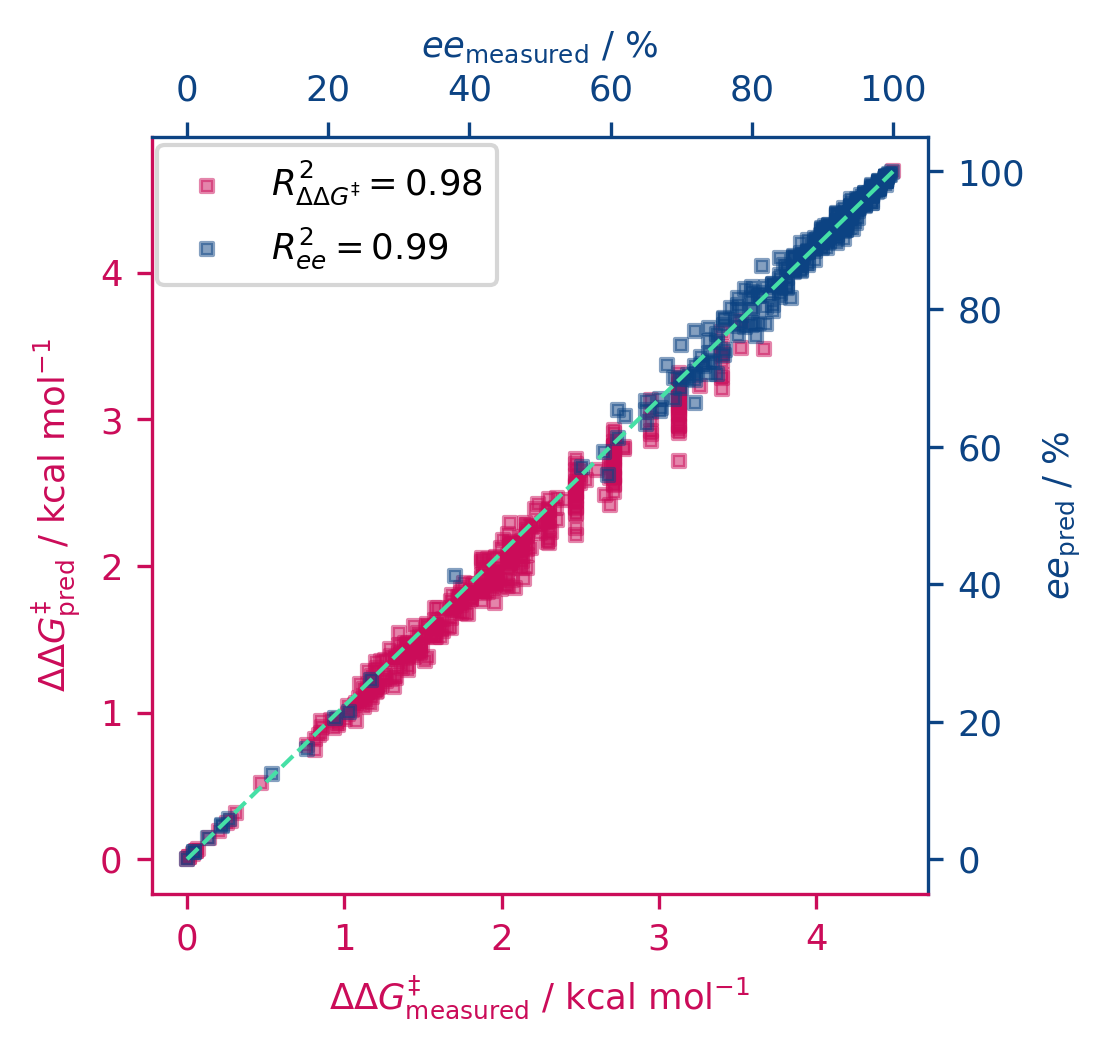

In [7]:
import pandas as pd
dataset = 'Sunoj_PNAS'
df = pd.read_csv(f'../code/datasets_230520/{dataset}.csv')
compare_ddg_ee_model(df['ee'], df['T'], dataset=dataset)